<a href="https://colab.research.google.com/github/tejaswi-2230/Crime-prediction/blob/main/crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import io

from google.colab import files
uploaded = files.upload()

zip_ref = zipfile.ZipFile('archive.zip')
zip_ref.extractall()
zip_ref.close()

Saving archive.zip to archive.zip


# **This aims to analyze youth crime in India (2001-2010) and explore factors shaping juvenile criminal behavior. Using NCRB data, the research investigates socio-economic, demographic, and geographic influences on crimes committed by young individuals. The goal is to uncover insights that inform strategies to reduce youth involvement in criminal activities.**

In [ ]:
juv_fam = pd.read_csv('/content/crime/18_03_Juveniles_arrested_Family_background.csv')
juv_reci = pd.read_csv('/content/crime/18_04_Juveniles_arrested_Recidivism.csv')
juv_edu = pd.read_csv('/content/crime/18_01_Juveniles_arrested_Education.csv')
juv_eco = pd.read_csv('/content/crime/18_02_Juveniles_arrested_Economic_setup.csv')

# **Finding null / missing values**

In [ ]:
juv_fam.isnull().sum()

Area_Name                                  0
Year                                       0
Sub_Group_Name                             0
Family_back_ground_Homeless                0
Family_back_ground_Living_with_guardian    0
Family_back_ground_Living_with_parents     0
Family_back_ground_Total                   0
dtype: int64

In [ ]:
juv_reci.isnull().sum()

Area_Name                    0
Year                         0
Sub_Group_Name               0
Recidivism_New_Delinquent    0
Recidivism_Old_Delinquent    0
Recidivism_Total             0
dtype: int64

In [ ]:
juv_edu.isnull().sum()

Area_Name                                                       0
Year                                                            0
Sub_Group_Name                                                  0
Education_Above_Primary_but_below_Matric_or_Higher_Secondary    0
Education_Illiterate                                            0
Education_Matric_or_Higher_Secondary_&_above                    0
Education_Total                                                 0
Education_Upto_primary                                          0
dtype: int64

In [ ]:
juv_eco.isnull().sum()

Area_Name                                                    0
Year                                                         0
Sub_Group_Name                                               0
Economic_Set_up_Annual_Income_250001_to_50000                0
Economic_Set_up_Annual_Income_upto_Rs_25000                  0
Economic_Set_up_Middle_income_from_100001_to_200000          0
Economic_Set_up_Middle_income_from_50001_to_100000           0
Economic_Set_up_Total                                        0
Economic_Set_up_Upper_income_above_Rs_300000                 0
Economic_Set_up_Upper_middle_income_from_200001_to_300000    0
dtype: int64

# **Data Visualisation**

<ipython-input-9-21cc151b16ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=juv_fam, x='Area_Name', y='Family_back_ground_Total',palette = custom_palette)
<ipython-input-9-21cc151b16ec>:5: UserWarning: 
The palette list has fewer values (12) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=juv_fam, x='Area_Name', y='Family_back_ground_Total',palette = custom_palette)


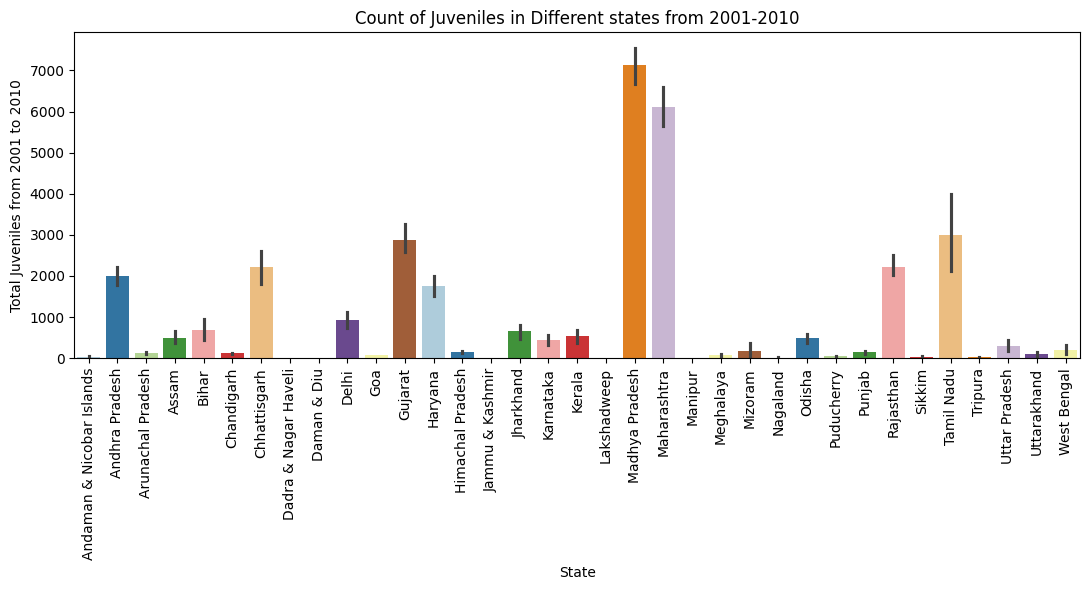

In [ ]:
plt.figure(figsize=(11, 6))

custom_palette = sns.color_palette("Paired")

sns.barplot(data=juv_fam, x='Area_Name', y='Family_back_ground_Total',palette = custom_palette)
plt.xticks(rotation=90)
plt.title('Count of Juveniles in Different states from 2001-2010')
plt.xlabel('State')
plt.ylabel('Total Juveniles from 2001 to 2010')
plt.tight_layout()
plt.show()

**States with higher counts are mostly located in the central and westernparts of India, while the states with lower counts are mostly in the eastern and southern parts of India. This could suggest that there are some socio-economic, cultural, or environmental factors that influence the juvenile count in different regions**


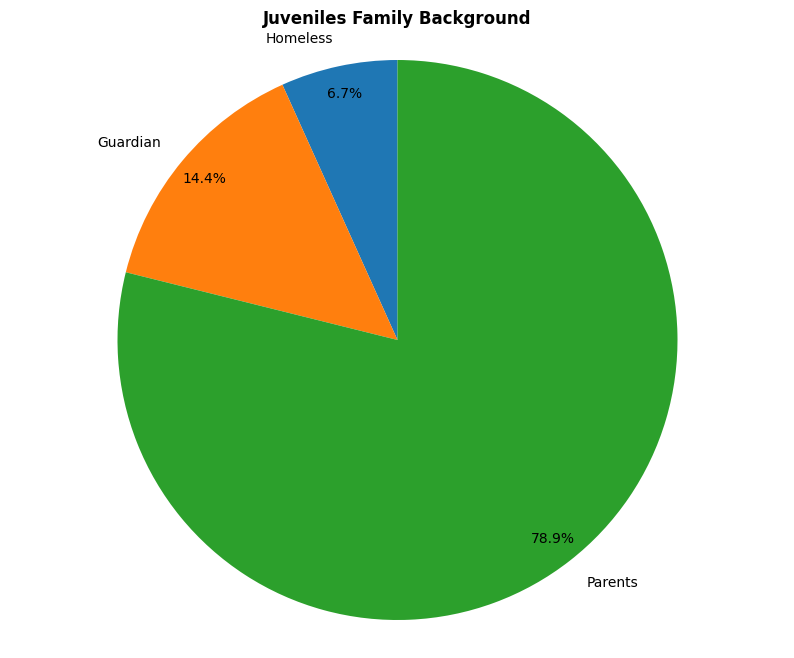

In [ ]:
labels = ['Homeless', 'Guardian', 'Parents']
sizes = [juv_fam['Family_back_ground_Homeless'].sum(), juv_fam['Family_back_ground_Living_with_guardian'].sum(), juv_fam['Family_back_ground_Living_with_parents'].sum()]

plt.figure(figsize=(10, 8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.9)
plt.title('Juveniles Family Background', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

 **The pie chart underscores a global trend revealing that a larger proportion of children residing with parents transition into juveniles compared to the
considerably smaller number of homeless juveniles. This highlights the overwhelming prevalence of children living in familial homes compared to those experiencing homelessness, emphasizing the substantial disparity in numbers between these two groups on a global scale.**

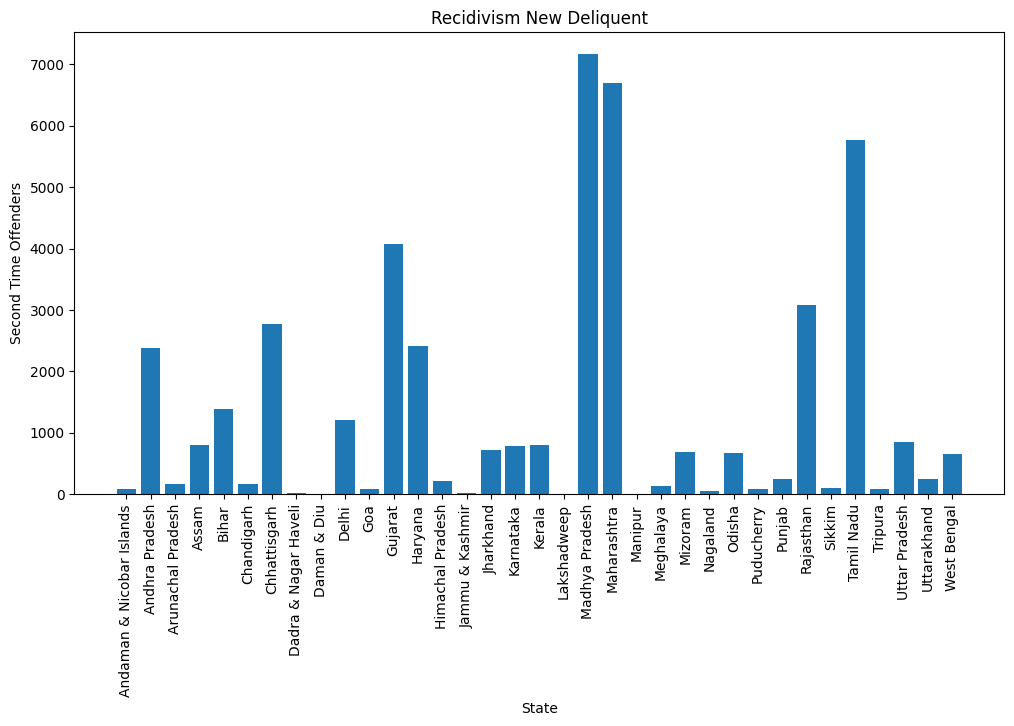

In [ ]:
plt.figure(figsize=(12, 6))

# custom_colors = sns.color_palette("Paired")

plt.bar(juv_reci['Area_Name'], juv_reci['Recidivism_New_Delinquent'])
plt.title('Recidivism New Deliquent')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Second Time Offenders')
plt.show()

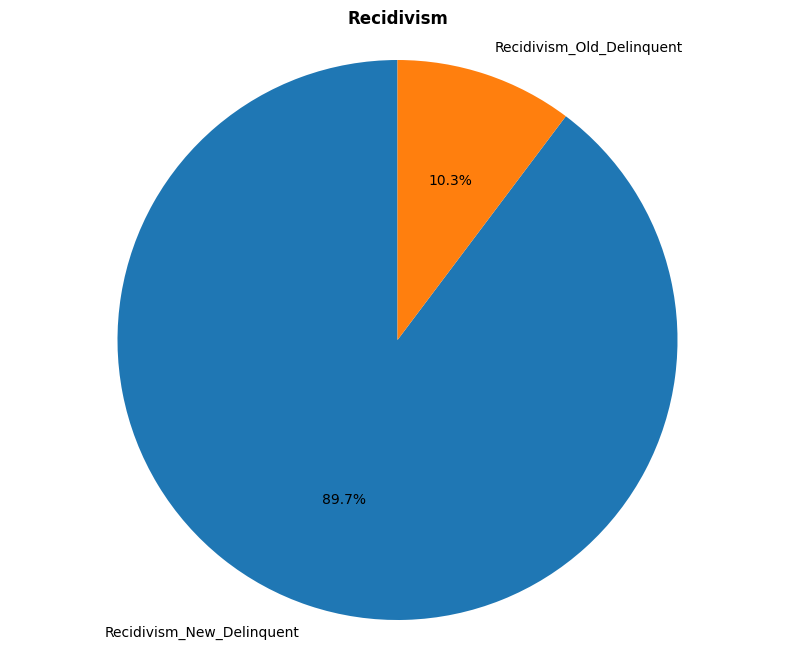

In [ ]:
labels = ['Recidivism_New_Delinquent', 'Recidivism_Old_Delinquent']
sizes = [juv_reci['Recidivism_New_Delinquent'].sum(), juv_reci['Recidivism_Old_Delinquent'].sum()]
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Recidivism', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


 **New delinquents are more likely to commit crimes again compared to those who have already committed crimes before, showing that it's important to focus on specific actions to stop them from committing crimes repeatedly.**

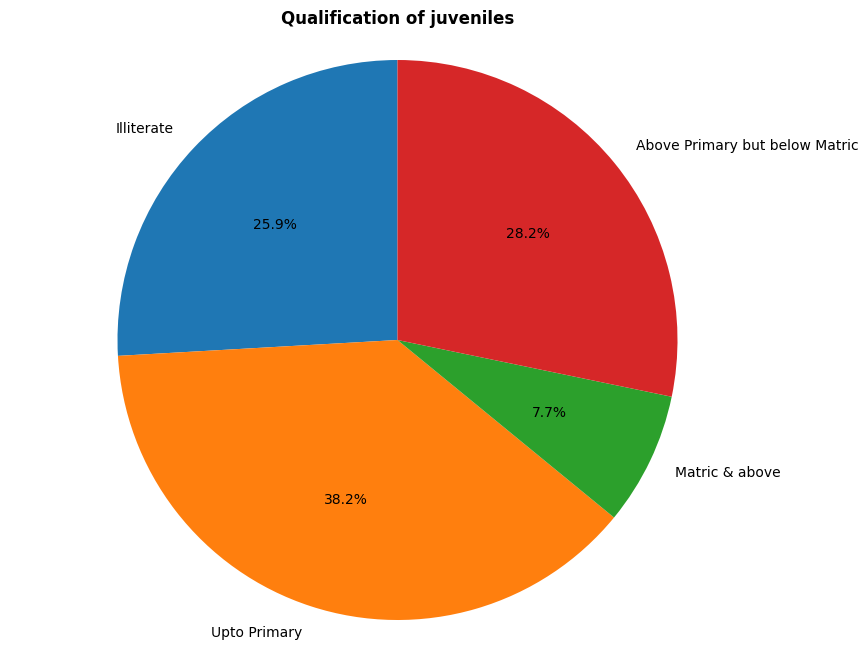

In [ ]:
labels = ['Illiterate', 'Upto Primary', 'Matric & above','Above Primary but below Matric']
sizes = [juv_edu['Education_Illiterate'].sum(),
         juv_edu['Education_Upto_primary'].sum(),
         juv_edu['Education_Matric_or_Higher_Secondary_&_above'].sum(),
         juv_edu['Education_Above_Primary_but_below_Matric_or_Higher_Secondary'].sum()]

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Qualification of juveniles', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

 **Substantial number of juveniles struggle to get a good education, which means they don't have many formal qualifications.  But only a few of them have finished high school or have higher qualifications. Highlighting a clear divide in educational achievements within this demographic.**

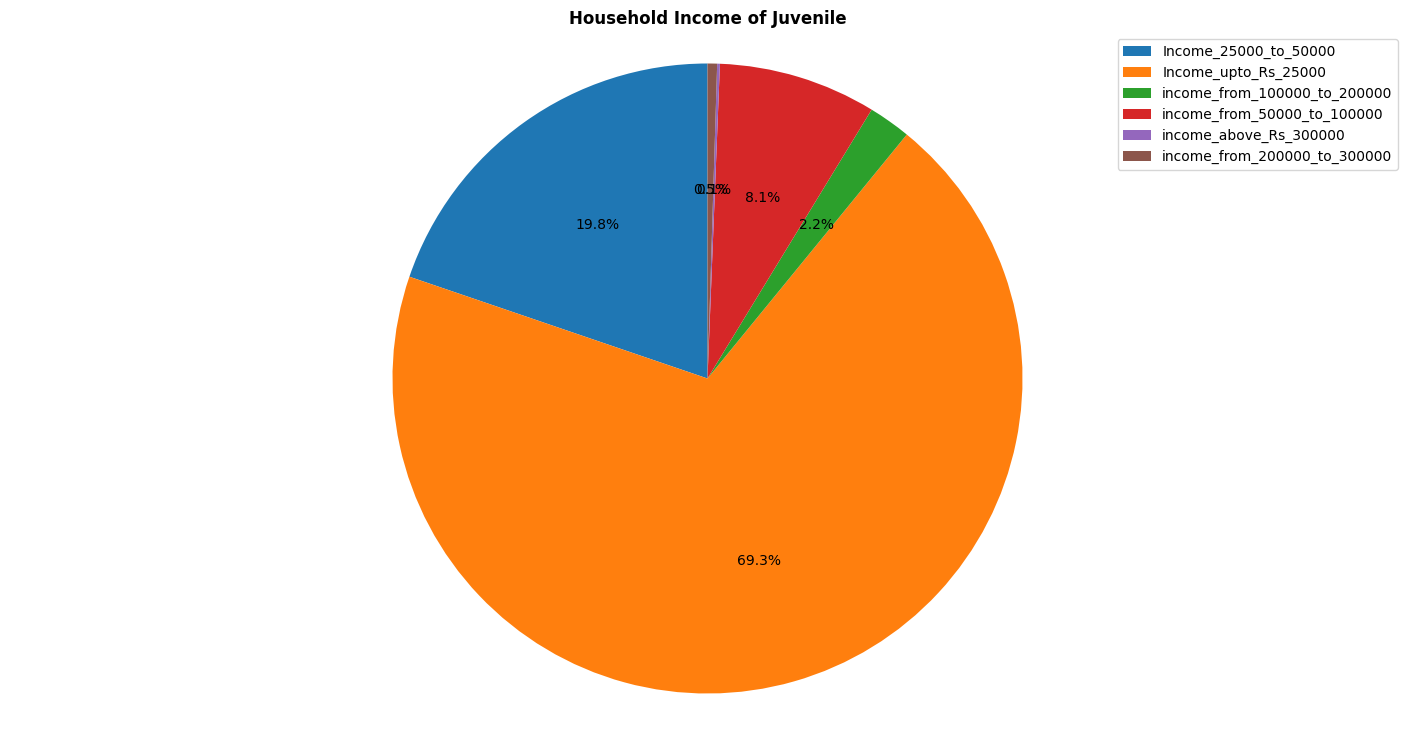

In [ ]:
labels = ['Income_25000_to_50000', 'Income_upto_Rs_25000', 'income_from_100000_to_200000','income_from_50000_to_100000','income_above_Rs_300000','income_from_200000_to_300000']

sizes = [juv_eco['Economic_Set_up_Annual_Income_250001_to_50000'].sum(),
         juv_eco['Economic_Set_up_Annual_Income_upto_Rs_25000'].sum(),
         juv_eco['Economic_Set_up_Middle_income_from_100001_to_200000'].sum(),
         juv_eco['Economic_Set_up_Middle_income_from_50001_to_100000'].sum(),
         juv_eco['Economic_Set_up_Upper_income_above_Rs_300000'].sum(),
         juv_eco['Economic_Set_up_Upper_middle_income_from_200001_to_300000'].sum()]

plt.figure(figsize=(18, 9))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, rotatelabels=True)
plt.title('Household Income of Juvenile' ,fontweight='bold' )
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()


<BarContainer object of 350 artists>

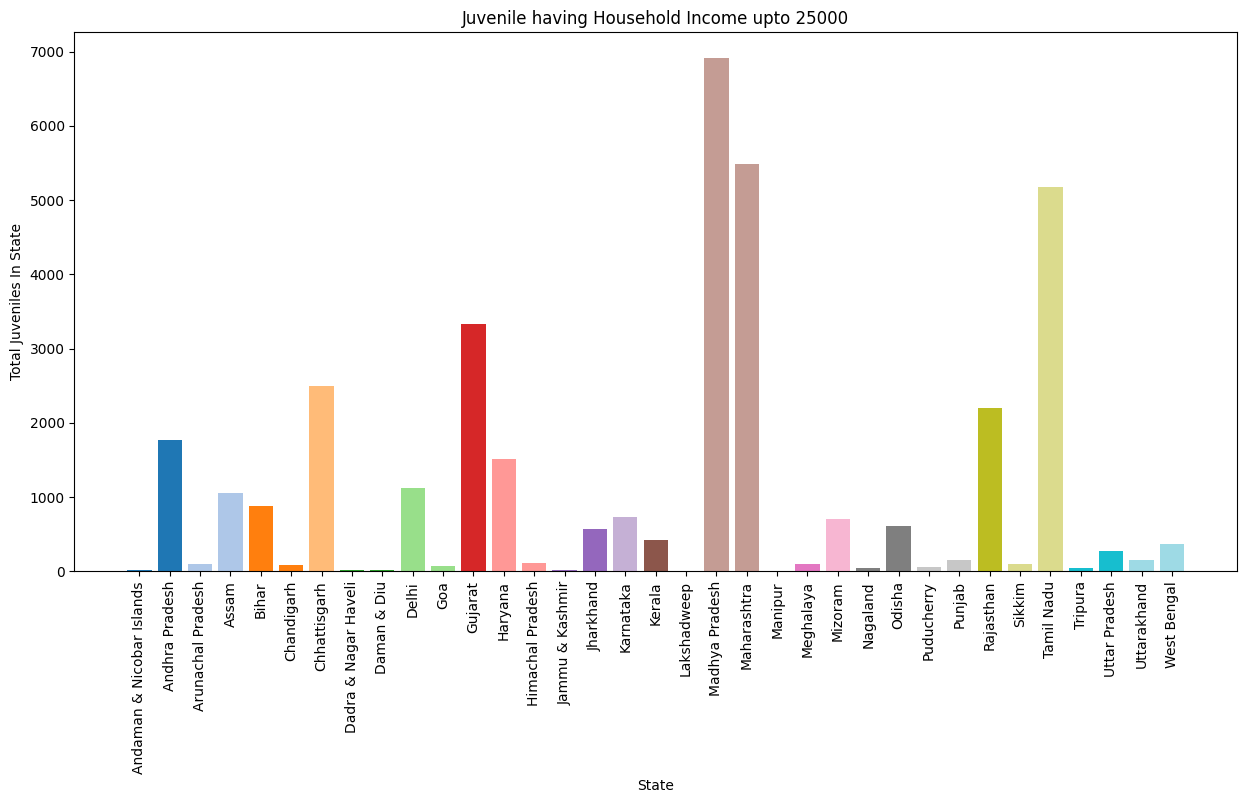

In [ ]:
custom_colors = plt.cm.tab20(np.linspace(0, 1, 35))

plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
plt.title('Juvenile having Household Income upto 25000')
plt.xlabel('State')
plt.ylabel('Total Juveniles In State')
plt.bar(juv_eco['Area_Name'], juv_eco['Economic_Set_up_Annual_Income_upto_Rs_25000'], label='Annual Income 25000' , color=custom_colors)

<BarContainer object of 350 artists>

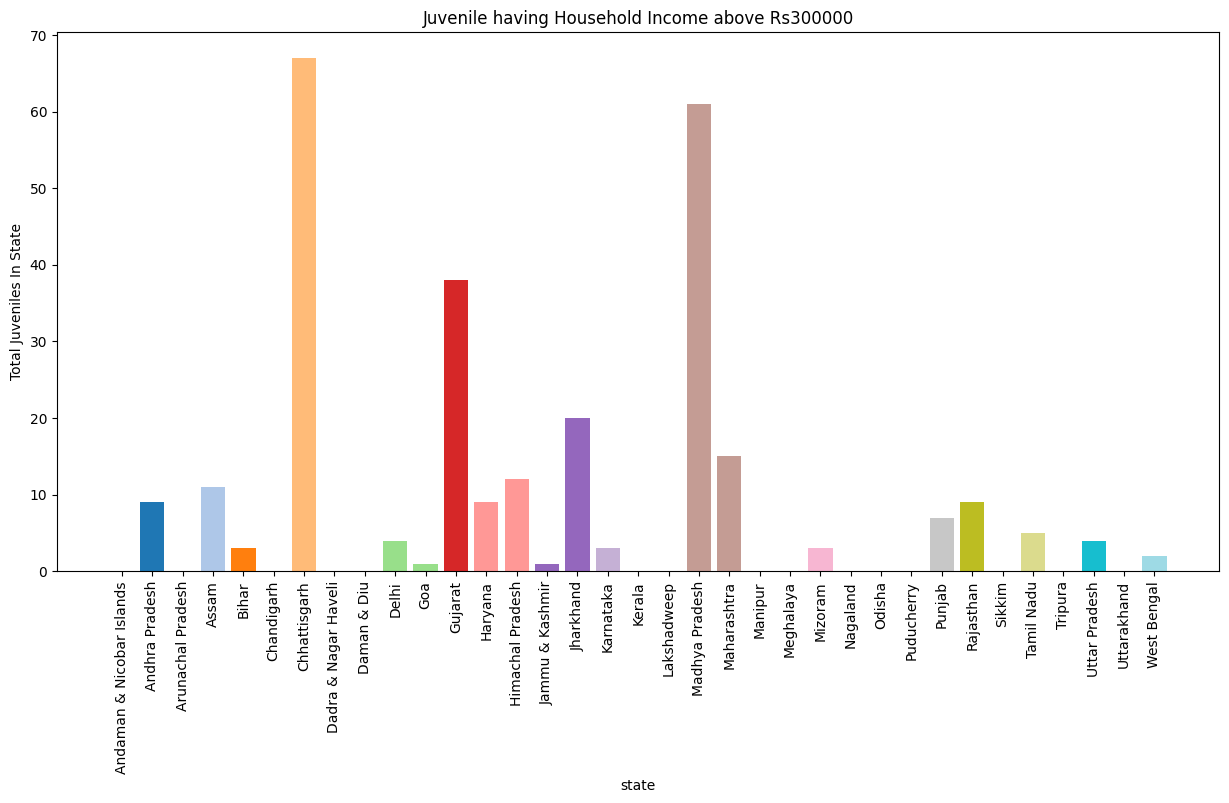

In [ ]:
custom_colors = plt.cm.tab20(np.linspace(0, 1, 35))

plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
plt.title('Juvenile having Household Income above Rs300000')
plt.xlabel('state')
plt.ylabel('Total Juveniles In State')
plt.bar(juv_eco['Area_Name'], juv_eco['Economic_Set_up_Upper_income_above_Rs_300000'], label='income_above_Rs_3000000', color=custom_colors)


**This graph suggests that Chattisgarh records the highest count of juveniles falling into the income bracket exceeding Rs 300,000, trailed by Madhya Pradesh, Gujarat, and Jharkhand, in descending order of prevalence.**

**The data analysis on young people in India from 2001 to 2010 shows big differences between regions. Madhya Pradesh has the most young people during this time, especially those who commit crimes more than once. Maharashtra, Tamil Nadu, Gujarat, Rajasthan, Chattisgarh, and Jharkhand also have a lot of young people, mostly in the central and western parts of India.

There's a connection between where young people live and how much money they have. States like Madhya Pradesh and Chattisgarh have more young people from poor families, while Maharashtra, Gujarat, and Tamil Nadu have more from wealthier families.

Most young people live with their parents instead of being homeless. But, even though they live with their families, many still get involved in crimes, especially if their families don't have much money.
The data also shows that most young people don't have a good education. Only a few have finished high school or have higher qualifications. This means there's a big need for better education for young people, especially in places where fewer people finish school.

Overall, the data shows that there are big differences between regions in India when it comes to young people. It also shows how things like money, education, and family can affect whether young people get involved in crime**

# **Rape cases**

# Rape is the fourth most common crime against women in India. Laws against rape come under the Indian Penal Code 376. Incest rape cases are registered under the condition where the offender is known to the victim.


# Incest rape cases reported from 2001 to 2010

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
victims = pd.read_csv('/content/drive/MyDrive/Info/20_Victims_of_rape.csv')

In [ ]:
victims.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [ ]:
victims['Subgroup'].unique()

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

**Rape victims in each state**

Between 2000-2010 there are 190K reported cases to police, most of these reported cases were in Madhya Pradesh, West Bengal, Uttar Pradesh, and Maharashtra **and** in Lakshadweep, Daman & Diu, Dadra & Nagar Haveli, and Puducherry, we saw low victims number, that is meaning in these states we have aware communities of the rape harm on women, not likes the other cites that have large victims of rape because reasons we don't know, maybe the high population and non-education in these states, or poverty,

In [ ]:
print('total number of victims: ',victims.groupby('Area_Name')['Victims_of_Rape_Total'].sum().sum()/2)
print('-'*100)
print(victims.groupby('Area_Name')['Victims_of_Rape_Total'].sum().sort_values(ascending=True)/2)

total number of victims:  190154.0
----------------------------------------------------------------------------------------------------
Area_Name
Lakshadweep                      7.0
Daman & Diu                     14.0
Dadra & Nagar Haveli            49.0
Puducherry                      57.0
Andaman & Nicobar Islands       84.0
Sikkim                         149.0
Nagaland                       176.0
Chandigarh                     228.0
Goa                            270.0
Manipur                        273.0
Arunachal Pradesh              412.0
Mizoram                        646.0
Meghalaya                      739.0
Uttarakhand                   1101.0
Himachal Pradesh              1453.0
Tripura                       1626.0
Jammu & Kashmir               2228.0
Gujarat                       3339.0
Karnataka                     3917.0
Punjab                        4307.0
Haryana                       5009.0
Delhi                         5171.0
Kerala                        5308.0
Tam

In [ ]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

g = pd.DataFrame(inc_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year','Cases Reported']

fig = px.bar(g,x='Year',y='Cases Reported',color_discrete_sequence=['blue'])
fig.show()

*   In 2005, around 750 cases were reported which is the highest number of that decade.
*   The year 2010 recorded the lowest number of cases i.e 288.



In [ ]:
above_50 = inc_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = inc_victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])

fig.show()




*   Women between the age group of 18-30 have been most affected

*   Women between the age group above 50 have been least affected



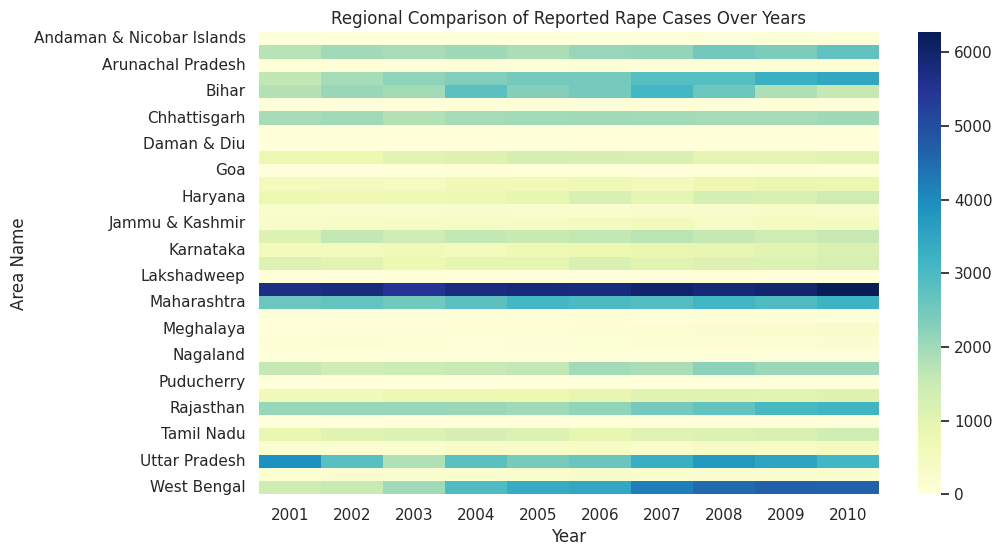

In [ ]:
# Regional Comparison
plt.figure(figsize=(10, 6))
sns.heatmap(victims.pivot_table(values='Rape_Cases_Reported', index='Area_Name', columns='Year', aggfunc='sum'), cmap='YlGnBu')
plt.title('Regional Comparison of Reported Rape Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Area Name')
plt.show()

In [ ]:
fig = px.choropleth(victims,
                   geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
                   locations = 'Area_Name',
                   featureidkey='properties.ST_NM',
                   color_continuous_scale='Viridis',
                   title = 'Rapes from 2001-2010',
                   color = 'Victims_of_Rape_Total'
                    )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


In [ ]:
crime_01_12 = pd.read_csv('/content/drive/MyDrive/Info/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crime_13 = pd.read_csv('/content/drive/MyDrive/Info/42_District_wise_crimes_committed_against_women_2013.csv')

In [ ]:
crime_01_12.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [ ]:
crime_13.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [ ]:
crime_01_12.columns = crime_01_12.columns.str.upper()
crime_13.columns = crime_13.columns.str.upper()
crime_13['STATE/UT'] = crime_13['STATE/UT'].str.upper()
crime_13['DISTRICT'].replace('ZZ TOTAL', 'TOTAL', inplace = True)


In [ ]:
dataframe = pd.concat([crime_01_12, crime_13])

In [ ]:
total_crime = dataframe[dataframe['DISTRICT'] == 'TOTAL']
punjab_crime = total_crime[total_crime['STATE/UT'] == 'PUNJAB']

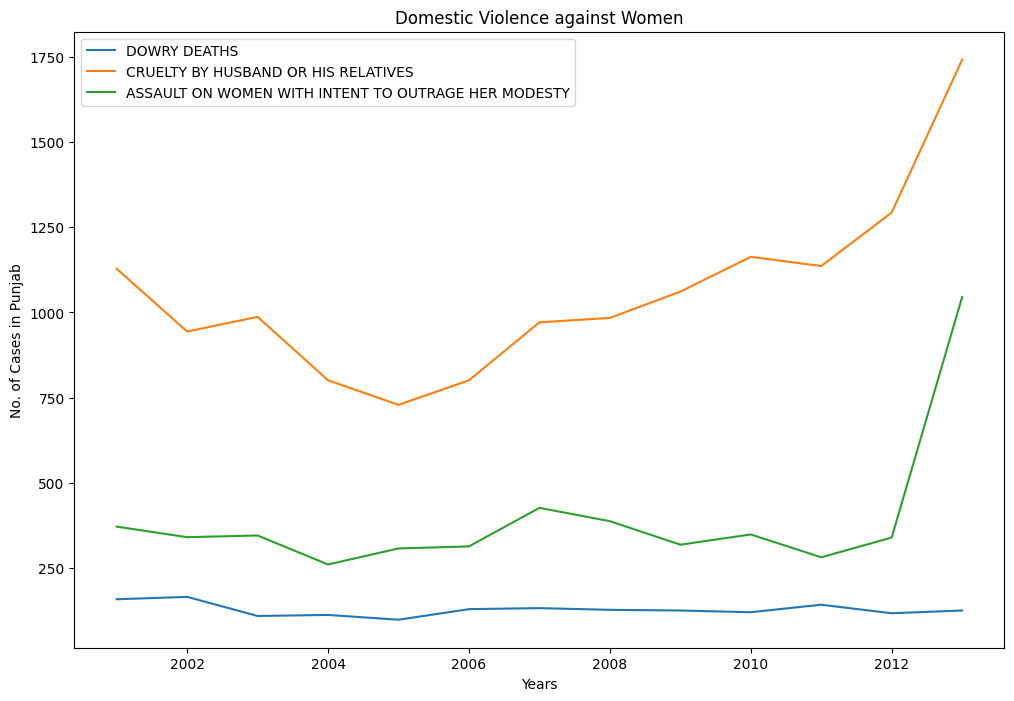

In [ ]:
punjab_crime.set_index('YEAR')[['DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']].plot(kind = 'line', figsize = (12,8))
plt.xlabel('Years')
plt.ylabel('No. of Cases in Punjab')
plt.title('Domestic Violence against Women')
plt.show()

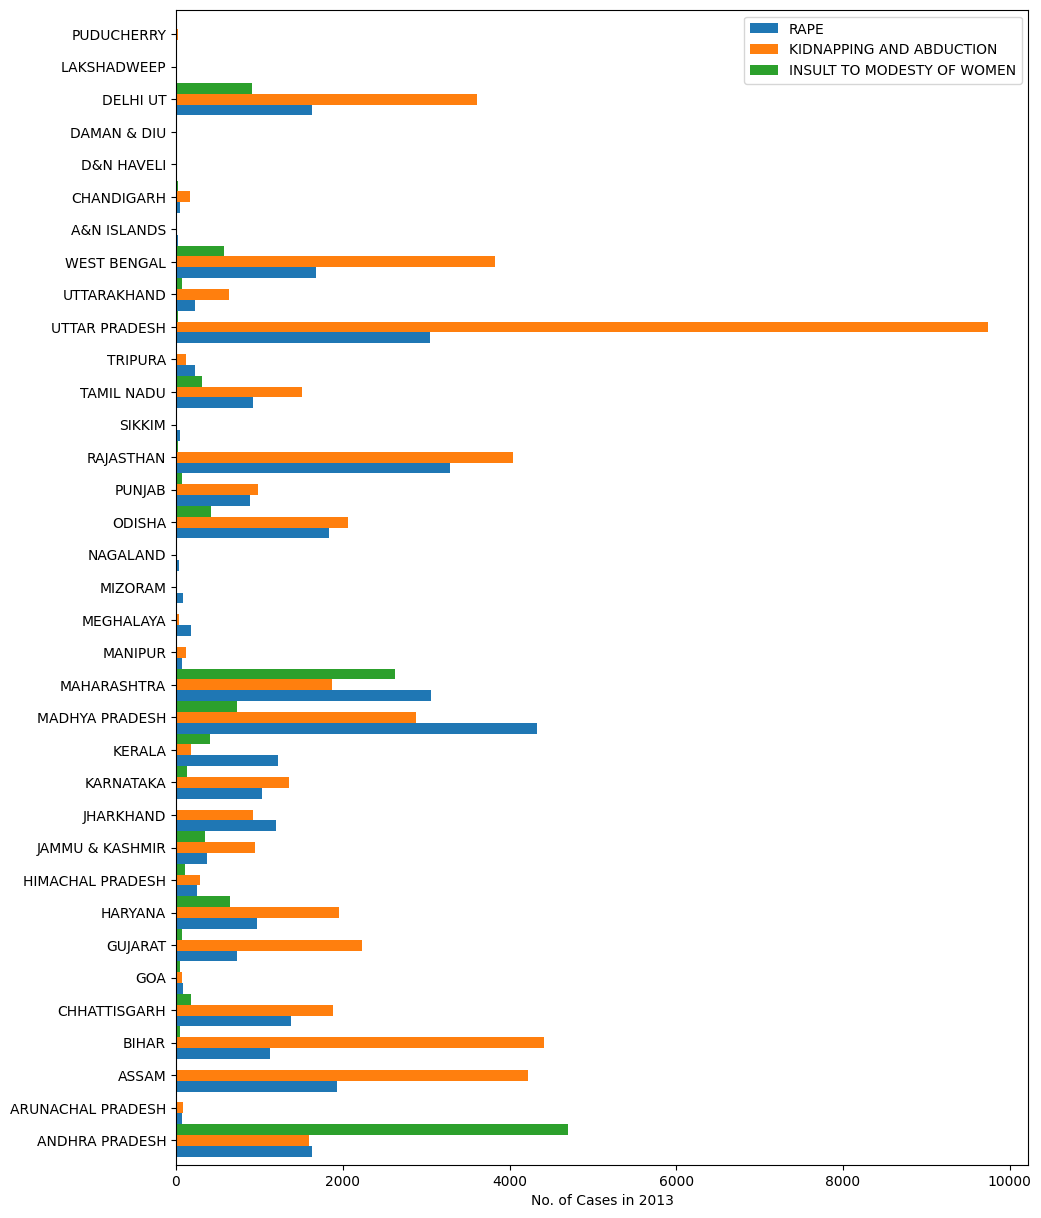

In [ ]:
data_13 = dataframe[(dataframe['DISTRICT'] == 'TOTAL') & (dataframe['YEAR'] == 2013)]

allstates24 = data_13[['RAPE', 'KIDNAPPING AND ABDUCTION','INSULT TO MODESTY OF WOMEN']].plot(kind = 'barh', figsize = (11,15), width = 1)
allstates24.set_xlabel('No. of Cases in 2013')
allstates24.set_yticklabels(data_13['STATE/UT'])
plt.show()

In [ ]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['DOWRY DEATHS'] > 7:
        return True
    else:
        return False

# Adding a new field "highCrime"
dataframe['highCrime'] = dataframe.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = dataframe.groupby('highCrime').size() * 100 / len(dataframe)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

highCrime
False    57.337398
True     42.662602
dtype: float64
------------------
Percentage Positive Instance = 42.66260162601626
Percentage Negative Instance = 57.33739837398374 


**After that, the code calculates the percentage of positive and negative instances in the dataset based on the values in the 'highCrime' column using groupby() and size() functions. It then divides the count of each group by the total length of the DataFrame to get the percentage.**

**Finally, it prints out the percentage of positive and negative instances, where positive instances correspond to 'highCrime' being True and negative instances correspond to 'highCrime' being False.**

In [ ]:
X = dataframe.drop('RAPE', axis=1) \
             .drop('IMPORTATION OF GIRLS', axis=1) \
             .drop('INSULT TO MODESTY OF WOMEN', axis=1) \
             .drop('CRUELTY BY HUSBAND OR HIS RELATIVES', axis=1) \
             .drop('STATE/UT', axis=1) \
             .drop('DOWRY DEATHS', axis=1) \
             .drop('DISTRICT', axis=1) \
             .drop('ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', axis=1) \
             .drop('KIDNAPPING AND ABDUCTION', axis=1) \
             .drop('highCrime', axis=1)

y = dataframe["highCrime"]



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .50,random_state = 10)

y_test


192     False
1636    False
4035    False
473     False
5154     True
        ...  
2266     True
3990     True
1241    False
2878    False
4489    False
Name: highCrime, Length: 4920, dtype: bool

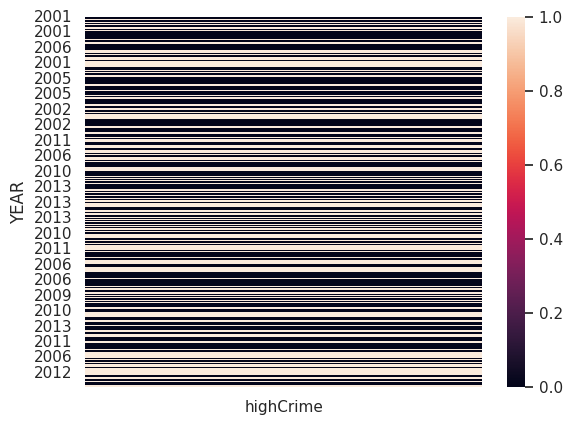

In [ ]:
testing = [x_test,y_test]
result = pd.concat(testing,axis = 1)
import seaborn as sns
sns.set()
result = result.set_index('YEAR')
sns.heatmap(result)
plt.show()


In [ ]:
print(result)

      highCrime
YEAR           
2001      False
2003      False
2006      False
2013      False
2008       True
...         ...
2004       True
2006       True
2002      False
2004      False
2007      False

[4920 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler # to standardize your feature variables. This process scales each feature to have a mean of 0 and a standard deviation of 1.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_curve, roc_curve, auc, log_loss
import numpy as np
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.568


In [ ]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))
#confusion matrix, which is a summary of prediction results for a classification problem.
#Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.
# It helps to visualize the performance of a classification algorithm.

              precision    recall  f1-score   support

       False       0.57      1.00      0.72      2795
        True       0.00      0.00      0.00      2125

    accuracy                           0.57      4920
   macro avg       0.28      0.50      0.36      4920
weighted avg       0.32      0.57      0.41      4920

[[2795 2125]
 [   0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

